# Project Overview

### 1. What is structured data?
* Data, which you can fit into DataFrame or CSV file
* There are feature variables, like weight, sex, heart rate and a the target, which we want to predict
* Structured Data Notebook - https://github.com/mrdbourke/zero-to-mastery-ml/tree/master/section-3-structured-data-projects
* End-to-end workflow - https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification-video.ipynb
* End-To-end workflow 2 - https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-heart-disease-classification.ipynb


### 2. Steps to take a new project
1. Have a computer with internet connection
2. Download and Install MiniConda
3. Start new project
4. Create project folder
5. Data
6. Create an environment
7. Jupyter Notebooks
8. Data Analysis & Manipulation
9. Machine Learning

### 3. Setting up our environment
1. Because we want the same conda env in the new project folder, we need to create a yml file, where all dependencies are listed
2. This we can do, by activating the environment and then run the following command: `conda env export > environment.yml`
3. With the Command `vim environment.yml` we can view the file
4. With this command `conda env create --prefix ./env -f ../environment.yml` we will build an environment from the file environment.yml
5. After it we can activate the environment using `conda activate` command
6. Lastly we createv a Data folder with our Data in it

===

# Predicting Heart Disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has hart disease based on their medical attributes 

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition

In a statement,
> Given Clinical Parameters about a patient, can we predict whether or not a patient has heart disease

## 2. Data

Here you can read more about the Dataset(Kaggle) - https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

The original data come from the Cleavland data from the UCI Machine learning repository - https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure the project

We will first create a PoC to look, if the DataSet has enough pattern to create a good machine learning model

# 4. Features

This is where you'll get different information about each of the features in your Data

**Create data dictonary**
* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    0. : Typical angina: chest pain related decrease blood supply to the heart
    1. : Atypical angina: chest pain not related to heart
    2. : Non-anginal pain: typically esophageal spasms (non heart related)
    3. : Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    0. : Nothing to note
    1. : ST-T Wave abnormality can range from mild symptoms to severe problems signals non-normal heart beat
    2. : Possible or definite left ventricular hypertrophy Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    0. : Upsloping: better heart rate with excercise (uncommon)
    1. : Flatsloping: minimal change (typical healthy heart)
    2. : Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
* thal - thalium stress result
    1. ,3. : normal
    6. : fixed defect: used to be defect but ok now
    7. : reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manupliation

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## 1. Data

In [4]:
df = pd.read_csv('./Data/heart-disease.csv')
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and becoma a subject matter export of the dataset you're working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different type?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Let's find out how many  of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

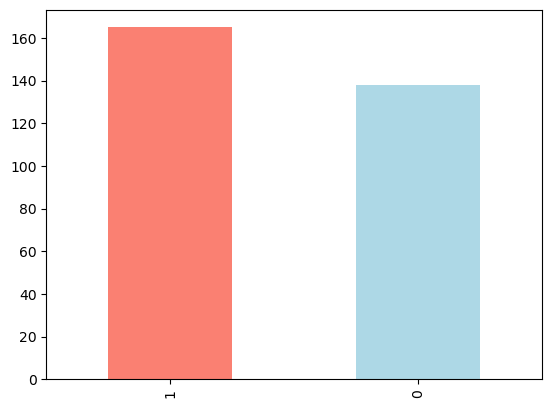

In [8]:
# Visualise the column
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [9]:
# Get some informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Find more out
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex
* Compare different columns with each other to view how features relate to target column

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target Column with Sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


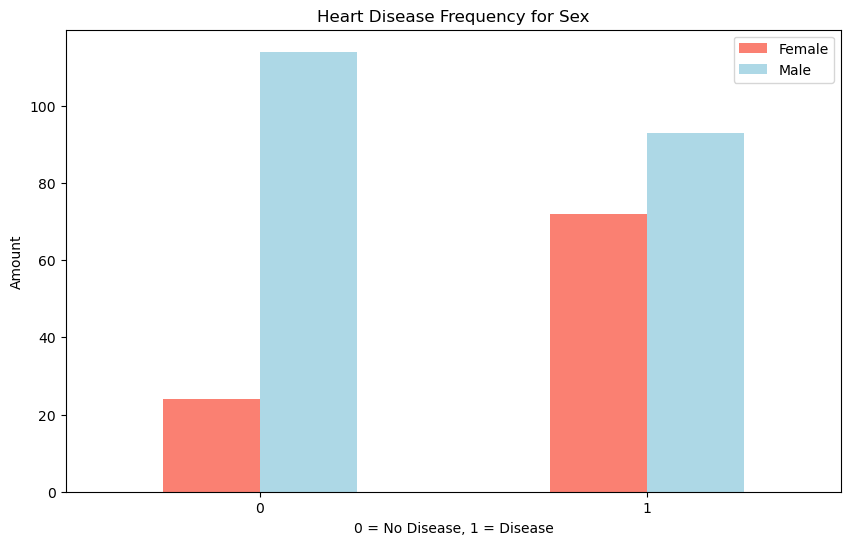

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=['salmon', 'lightblue']);

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0); # set current tick location

## Age vs Max Heart Rate for Heart Disease

In [15]:
# Compare independent varibale
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
97      1
127     1
118     1
134     1
90      1
Name: thalach, Length: 91, dtype: int64

In [16]:
# all age columns, where target is one
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

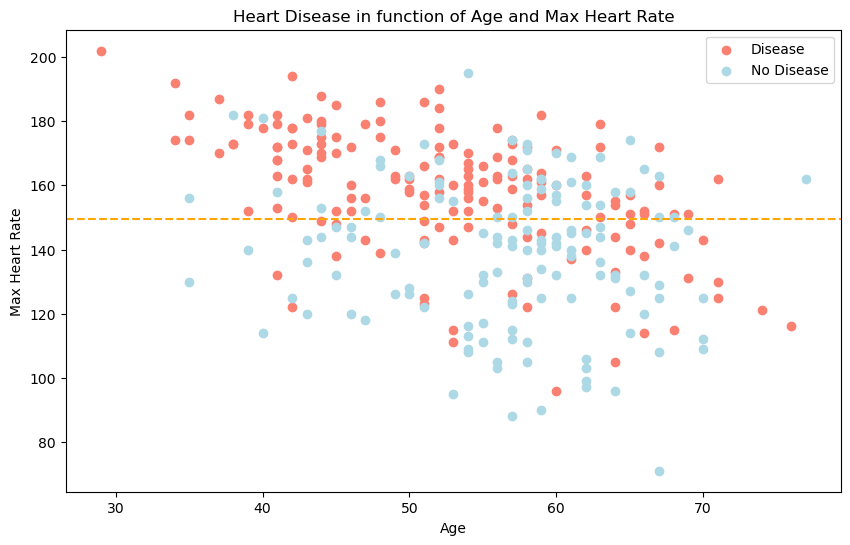

In [17]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon');

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue');

# Add some helpful info
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])
plt.axhline(np.mean(df.thalach), color='orange', linestyle='--', label='Mean');

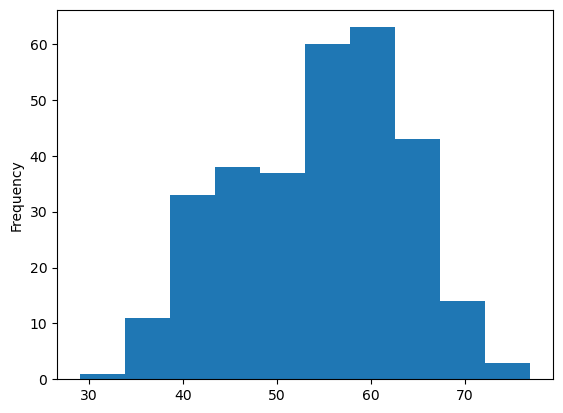

In [18]:
# Check the distribution of the age column
df.age.plot.hist();

### Heart Disease Freequency per Chest Pain Type
3. cp - chest pain type
    * Typical angina: chest pain related decrease blood supply to the heart
    * Atypical angina: chest pain not related to heart
    * Non-anginal pain: typically esophageal spasms (non heart related)
    * Asymptomatic: chest pain not showing signs of disease

In [19]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


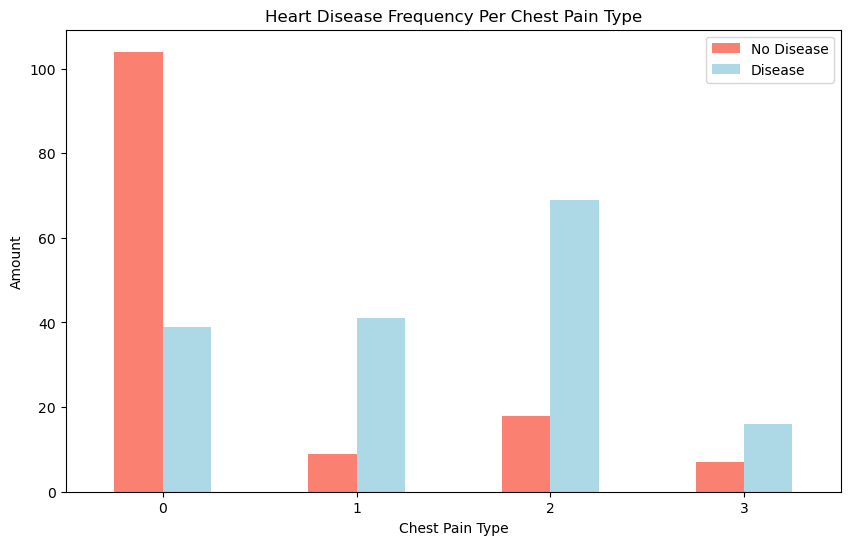

In [20]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10, 6),
                                   color=['salmon', 'lightblue'])

# Add some communication
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation=0);

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


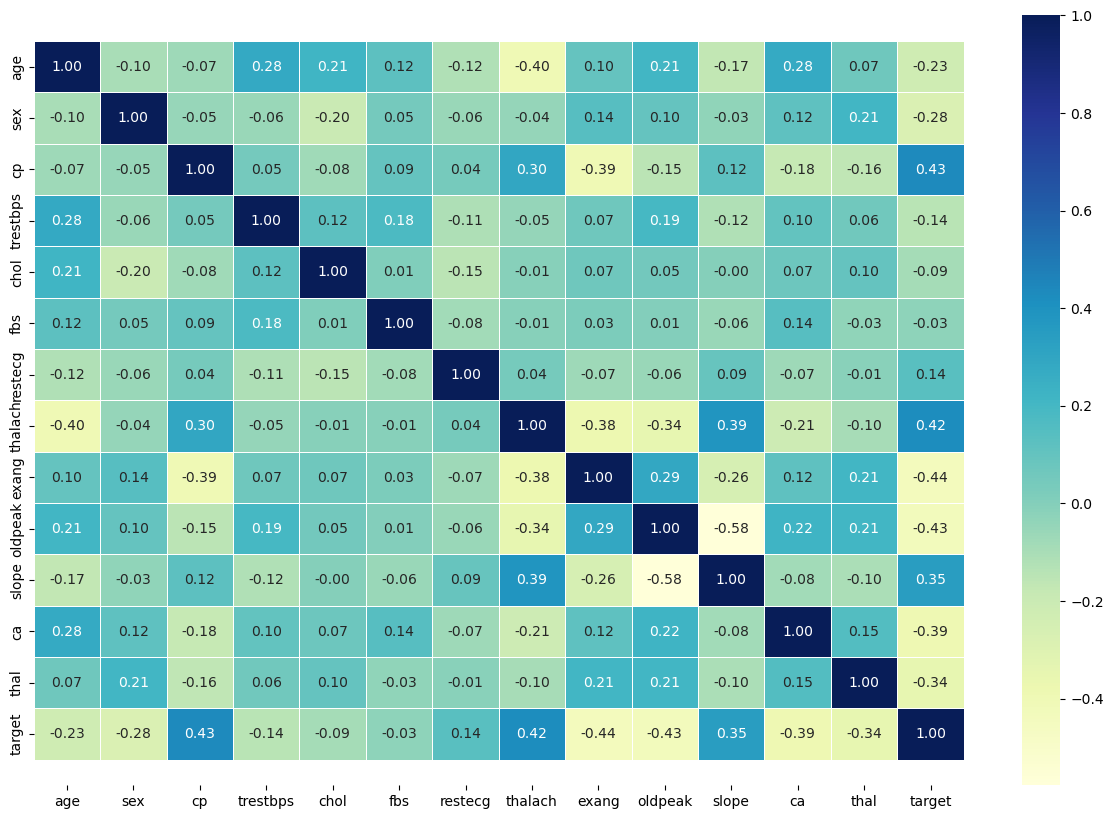

In [23]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f', # round it
                 cmap='YlGnBu')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

# 5. Modelling

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
# Split into X and y
X = df.drop('target', axis=1)
y = df['target']

# numpy random seed
np.random.seed(42)

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [26]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [27]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and tst sets it's time to build a machine learning model

We'll train it (find the patterns) on the training set.

We'll test it (use the patterns) on the test set.

We're going to try three different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

Why logistic regression? 
* To learn something about new model

In [28]:
# Put models in a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    
    models : a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    '''  
    # Set random seed
    np.random.seed(42)
    
    # Make a dictonary to keep model score
    model_scores = {}
    
    # Loop through models
    for name, model in models.items(): # for key, value
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append it's score to model_scores
        model_scores[name] = model.score(X_test, y_test)   
    return model_scores

In [29]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/Users/ferencburian/Documents/courses/machine_learning/scripts/heart-disease-project-main/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

<Axes: >

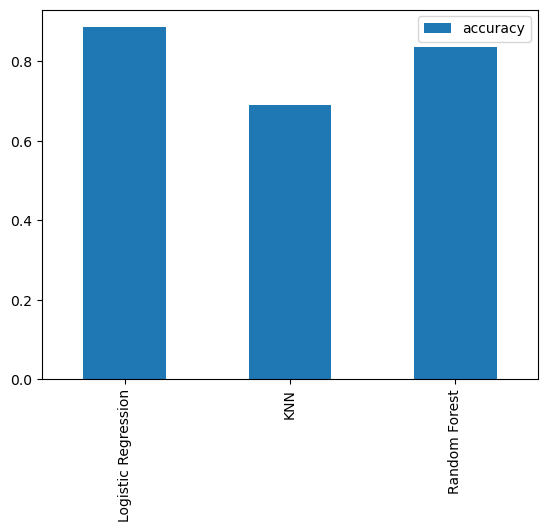

In [30]:
# Create df with all the scores
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

# Transpose and plot it with bar plot
model_compare.T.plot.bar()

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps of. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC Curve 
* Area under the curve (AUC)

### Hyperparameter tuning by Hand

In [31]:
# Let's tune KNN
train_score = []
test_score = []

# Create a list of different vlaues for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training score list
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_score.append(knn.score(X_test, y_test))   

In [32]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


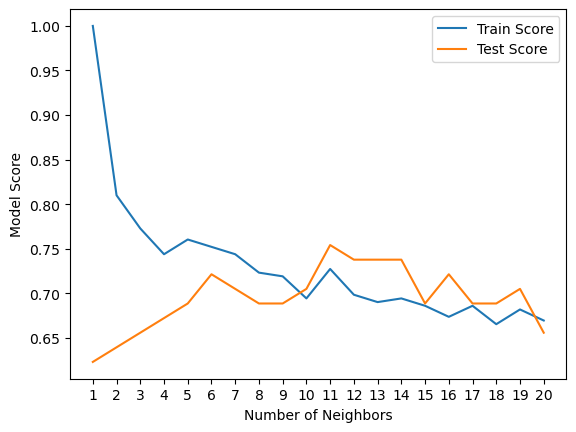

In [34]:
# View it
plt.plot(neighbors, train_score, label='Train Score')
plt.plot(neighbors, test_score, label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_score)*100:.2f}%')

### Hyperparameter tuning using `RandomizedSearchCV`

We're going to tune:
* LogistiRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [35]:
np.logspace(-4, 4, 20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [36]:
np.arange(10, 1000, 50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

In [37]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {
    'C': np.logspace(-4, 4, 20), # number spaced evenly 
    'solver': ['liblinear']
}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators':np.arange(10, 1000, 50), # highly recommended to use ranges
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

Now we've got hyperparameter grids setup for each of our models, let's tune them using `RandomizedSearchCV`

In [38]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [40]:
# Model hasn't improved
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned `LogisticRegression()`, let's do the same for `RandomForestClassifier()`

In [41]:
# Setup random hyperparameter search for RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [42]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [43]:
# Model has improved
rs_rf.score(X_test, y_test)

0.8688524590163934

In [44]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Tuning Hyperparameters using `GridSearchCV`

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using `GridSearchCV`

In [45]:
# Tune LogisticRegression
np.random.seed(42)

# Different hyperparameters for our LogisticRegression model
log_reg_grid = {
    'C': np.logspace(-4, 4, 30), 
    'solver': ['liblinear']
}

# Setup gird hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                                log_reg_grid,
                                cv=5,
                                verbose=2)

# Fit grid hyperparameter search model for LogisticRegression
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END .............C=417.53189365604004, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END .............C=1487

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [46]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [47]:
# Evaluate the grid search for LogisticRegression
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accurarcy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [49]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [50]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [51]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

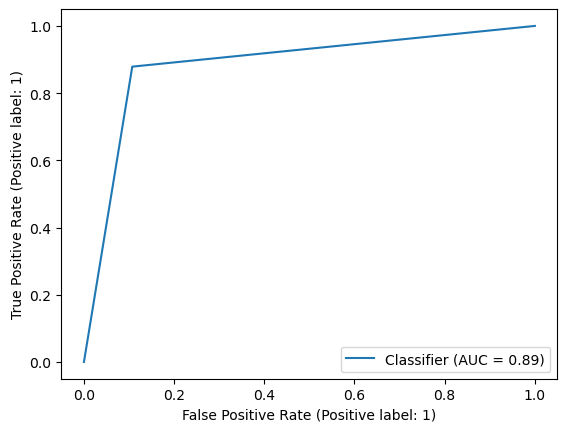

In [63]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_predictions(y_preds, y_test)

In [64]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


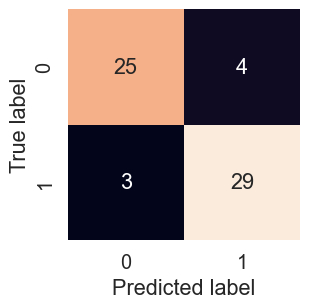

In [66]:
sns.set(font_scale=1.3) # Increase font size
 
# Create plotting function
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curvem an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and F1 score

In [68]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [71]:
cv_score = cross_val_score(gs_log_reg, X, y, cv=5)
 

f1 = f1_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END ..............C=788.0462815669904, solver=liblinear; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END .............C=1487.3521072935118, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END .............C=2807.2162039411755, solver=liblinear; total time=   0.0s
[CV] END ..............C=529

[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.22162910704503, solver=liblinear; total time=   0.0s
[CV] END .............C=221.

[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END .............C=1.3738237958832638, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=2.592943797404667, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.893900918477489, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.893900918477489, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.893900918477489, solver=liblinear; total time=   0.0s
[CV] END ..............C=4.8

[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END ............C=0.03039195382313198, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END ............C=0.05736152510448681, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s
[CV] END .............C=0.1082636733874054, solver=liblinear; total time=   0.0s
[CV] END ............C=0.204

[CV] END ...........C=0.004520353656360241, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.004520353656360241, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.008531678524172805, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01610262027560939, solver=liblinear; total time=   0.0s
[CV] END ............C=0.030

### Calculate evaluation metrics using cross-validation

We're going to calculate, precision, recall and f1 score using cross-validation and to do so, we'll be uing `cross_val_score()` 

In [72]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [74]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [80]:
# Cross-validated accruarcy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [81]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [84]:
# Cross-Validated Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [83]:
# F1 Score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

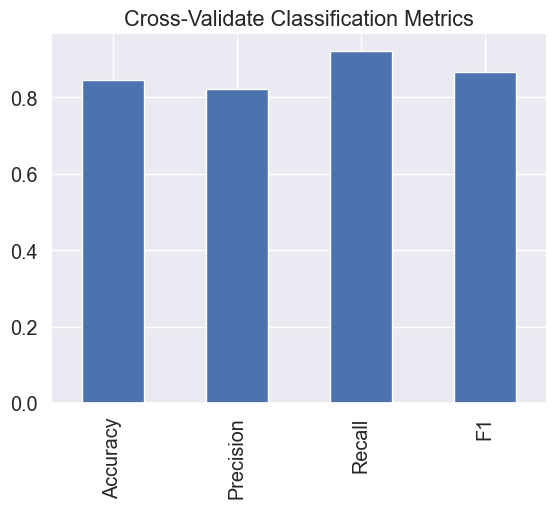

In [89]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1,
                           }, index=[0])

cv_metrics.T.plot.bar(title='Cross-Validate Classification Metrics', legend=False);

### Feature Importance (Model Driven EDA)

Feature importance is another ways of asking, 'which features contributed most the outcomes of the model and how did they contribute?'

Finding feature importance is different for wach machine learning model. One way to feature imortance is to search for '(Model Name) feature importance'

Let's find feature importance for our LogisticRegression model

In [92]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [93]:
# Check coef_ to view value how each feature contributes to our target
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [95]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0]))) # zip into dict
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

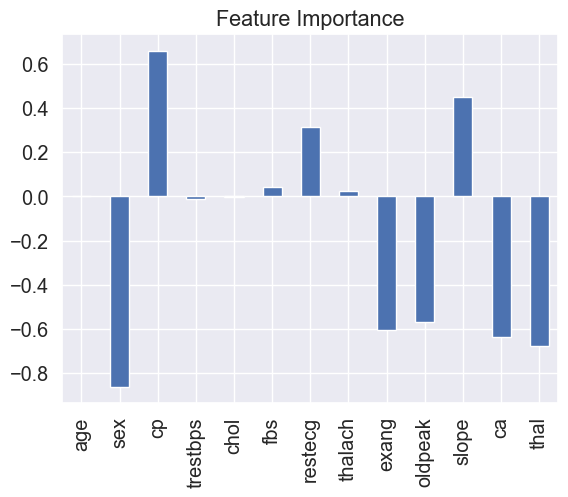

In [98]:
# Visualize feature iomportance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);

In [99]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [101]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourselff ...
* Could you collect more data?
* Could you try a better model? Like CatBoost orXGBoost?
* Could you improve the current model? (Byond what we've done so far)
* If your model is good enough (you have hit your evluation metric) how would you export it and share with others?